In [1]:
# BOW - Bag of Words( capturing single single words from a string)
# bi-gram - Capturing 2 words at a time sequentially
# tri-gram - Capturing 3 words at a time sequentially
# n-gram- All these methods are called n-grams.

In [2]:
# n gram increases the data dimentionality

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
v.fit(['Thor Hathodawala is looking for a job'])
v.vocabulary_
# lexographically arranges the data [0,n]

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [4]:
v = CountVectorizer(ngram_range=(1,2))
# first single token then bi-gram
# if (1,3) then BOw->bi-gram->tri-gram
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [5]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]
corpus


['Thor ate pizza', 'Loki is tall', 'Loki is eating pizza']

In [13]:
len(corpus)

3

In [10]:
import spacy
nlp = spacy.load('en_core_web_sm') #english model nlp object

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
    


In [18]:
corpus_processed = []
for i in range(len(corpus)):
    s = preprocess(corpus[i])
    corpus_processed.append(preprocess(s))

In [19]:
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [20]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed) # creates the vocab
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [21]:
# Now generate bag of n gram vector for few sample documents
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [27]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

# News Category Dataset

In [40]:
import pandas as pd

In [41]:
# load data

df = pd.read_json('News_Category_Dataset.json', lines=True)
df.head()

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT


In [42]:
df.shape

(124989, 6)

In [47]:
df.drop(columns =['date', 'link'],inplace = True)

In [48]:
df

,short_description,headline,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,ENTERTAINMENT
...,...,...,...,...
124984,,Why I Thought I'd Never Live To See 33,,WOMEN
124985,I often hear people describe cooking for one a...,Five Tips For Cooking For One,"Food Riot, ContributorPlay with your food.",TASTE
124986,,Police Want your Home Video Surveillance Footage,"Robert Siciliano, ContributorPersonal Security...",CRIME
124987,,"Ouch, Natalie Morales",Katherine Fung,MEDIA


In [49]:
df['text'] = df['short_description']+' '+df['headline'] + ' ' + df['authors']

In [50]:
df

,short_description,headline,authors,category,text
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,CRIME,She left her husband. He killed their children...
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...,...,...
124984,,Why I Thought I'd Never Live To See 33,,WOMEN,Why I Thought I'd Never Live To See 33
124985,I often hear people describe cooking for one a...,Five Tips For Cooking For One,"Food Riot, ContributorPlay with your food.",TASTE,I often hear people describe cooking for one a...
124986,,Police Want your Home Video Surveillance Footage,"Robert Siciliano, ContributorPersonal Security...",CRIME,Police Want your Home Video Surveillance Foot...
124987,,"Ouch, Natalie Morales",Katherine Fung,MEDIA,"Ouch, Natalie Morales Katherine Fung"


In [51]:
df.drop(columns =['authors', 'short_description','headline'],inplace = True)
df

,category,text
0,CRIME,She left her husband. He killed their children...
1,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...
2,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ..."
...,...,...
124984,WOMEN,Why I Thought I'd Never Live To See 33
124985,TASTE,I often hear people describe cooking for one a...
124986,CRIME,Police Want your Home Video Surveillance Foot...
124987,MEDIA,"Ouch, Natalie Morales Katherine Fung"


In [52]:
df.category.value_counts()

POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMPACT             2602
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TRAVEL             2145
TASTE              2096
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
SCIENCE            1381
ARTS & CULTURE     1339
TECH               1231
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: category, dtype: int64

In [54]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [64]:
df_filtered = df[(df['category'] == 'POLITICS') | (df['category'] == 'ENTERTAINMENT') | (df['category'] == 'SPORTS') | (df['category'] == 'CRIME') | (df['category'] == 'BUSINESS')]

In [65]:
df_filtered

,category,text
0,CRIME,She left her husband. He killed their children...
1,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...
2,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ..."
...,...,...
124978,POLITICS,The baiting and the assault on Obama will get ...
124979,POLITICS,Lawmakers Introduce Bill To Tackle Misleading...
124980,POLITICS,"I'm assuming you are aware of this issue, Pres..."
124983,POLITICS,The Obama Effect


In [66]:
df_filtered.category.value_counts()

POLITICS         32739
ENTERTAINMENT    14257
BUSINESS          4254
SPORTS            4167
CRIME             2893
Name: category, dtype: int64

In [69]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'ENTERTAINMENT': 3,'POLITICS':4}

df_filtered['category_num'] = df_filtered['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'ENTERTAINMENT': 3,
    'POLITICS':4
})

C:\Users\amank\AppData\Local\Temp/ipykernel_12732/3102350822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category_num'] = df_filtered['category'].map({


In [70]:
df_filtered.head()

,category,text,category_num
0,CRIME,She left her husband. He killed their children...,2
1,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...,3
2,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,3
3,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...,3
4,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ...",3


In [72]:
# In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.

In [73]:
min_samples = 2893 # we have these many SCIENCE articles and SCIENCE is our minority class


df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_politics = df[df.category=="POLITICS"].sample(min_samples, random_state=2022)
df_ent = df[df.category=="ENTERTAINMENT"].sample(min_samples, random_state=2022)


In [76]:
df_filtered = pd.concat([df_business,df_sports,df_crime,df_politics,df_ent],axis=0)
df_filtered.category.value_counts()

BUSINESS         2893
SPORTS           2893
CRIME            2893
POLITICS         2893
ENTERTAINMENT    2893
Name: category, dtype: int64

In [77]:
df_filtered

,category,text
120663,BUSINESS,Conscious awareness of the comfort principle i...
57531,BUSINESS,5 Business Lessons You Can Learn from Fitness...
61632,BUSINESS,Other regulators are stepping up while the SEC...
13088,BUSINESS,"Men run everything, and it's enough already. W..."
80943,BUSINESS,The stand-out national problem we have today i...
...,...,...
90216,ENTERTAINMENT,Still a bit to go until the Palme d'Or and Un ...
972,ENTERTAINMENT,It's all in the details. Blake Lively Brought ...
29147,ENTERTAINMENT,Bruce Langhorne may have been the real-life Mr...
1523,ENTERTAINMENT,Cosby was found guilty on Thursday of three fe...


In [78]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'ENTERTAINMENT': 3,'POLITICS':4}

df_filtered['category_num'] = df_filtered['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'ENTERTAINMENT': 3,
    'POLITICS':4
})

In [80]:
df_balanced  = df_filtered
df_balanced

,category,text,category_num
120663,BUSINESS,Conscious awareness of the comfort principle i...,0
57531,BUSINESS,5 Business Lessons You Can Learn from Fitness...,0
61632,BUSINESS,Other regulators are stepping up while the SEC...,0
13088,BUSINESS,"Men run everything, and it's enough already. W...",0
80943,BUSINESS,The stand-out national problem we have today i...,0
...,...,...,...
90216,ENTERTAINMENT,Still a bit to go until the Palme d'Or and Un ...,3
972,ENTERTAINMENT,It's all in the details. Blake Lively Brought ...,3
29147,ENTERTAINMENT,Bruce Langhorne may have been the real-life Mr...,3
1523,ENTERTAINMENT,Cosby was found guilty on Thursday of three fe...,3


In [81]:
# Build a model with original text (no pre processing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [82]:
print(X_train.shape)
X_train.head()

(11572,)


63105     Energy companies that issued new share offerin...
3330      She'll also lend her voice to an animated seri...
89838     While the extent of the criminal charges are e...
124118    An economy with nobody working is boring. The ...
5206      The team plans to wear the patch all year to c...
Name: text, dtype: object

In [83]:
y_train.value_counts()

3    2315
2    2315
0    2314
1    2314
4    2314
Name: category_num, dtype: int64

In [84]:
y_test.value_counts()

1    579
4    579
0    579
2    578
3    578
Name: category_num, dtype: int64

In [85]:
# Use 1-gram  which is nothing but a Bag Of Words (BOW) model

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       579
           1       0.91      0.90      0.91       579
           2       0.85      0.90      0.88       578
           3       0.93      0.86      0.89       578
           4       0.83      0.85      0.84       579

    accuracy                           0.87      2893
   macro avg       0.88      0.87      0.87      2893
weighted avg       0.88      0.87      0.87      2893



In [87]:
X_test[:5]

30159     Oops! Cops Foot $55,000 Bill For Cell Phone Th...
93780      Cop In Walter Scott Shooting Reportedly Heard...
120903     Suspected Seattle Gunman Suffers From Severe ...
111238     Heroin Is Cheaper Than Beer And Easy To Get I...
106059                Everyone's Going To See 'Mockingjay' 
Name: text, dtype: object

In [89]:
y_pred[:5]

array([2, 2, 2, 0, 3], dtype=int64)

In [90]:
y_test[:5]

30159     2
93780     2
120903    2
111238    2
106059    3
Name: category_num, dtype: int64

In [91]:
#  Use 1-gram and bigrams

In [92]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       579
           1       0.92      0.89      0.90       579
           2       0.87      0.90      0.88       578
           3       0.95      0.82      0.88       578
           4       0.82      0.85      0.83       579

    accuracy                           0.87      2893
   macro avg       0.87      0.87      0.87      2893
weighted avg       0.87      0.87      0.87      2893



In [97]:
# Use 1-gram to trigrams

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       579
           1       0.91      0.88      0.90       579
           2       0.88      0.89      0.89       578
           3       0.95      0.80      0.87       578
           4       0.80      0.85      0.83       579

    accuracy                           0.86      2893
   macro avg       0.87      0.86      0.86      2893
weighted avg       0.87      0.86      0.86      2893



In [98]:
y_pred[:5]

array([2, 2, 2, 0, 3], dtype=int64)

In [99]:
y_test[:5]

30159     2
93780     2
120903    2
111238    2
106059    3
Name: category_num, dtype: int64

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[514,  11,   7,   3,  44],
       [ 27, 509,  14,  12,  17],
       [ 21,  10, 517,   2,  28],
       [ 42,  21,  21, 462,  32],
       [ 43,   7,  28,   8, 493]], dtype=int64)

Text(69.0, 0.5, 'Truth')

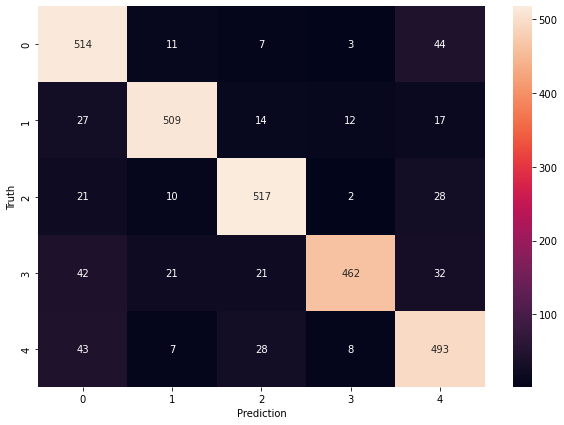

In [101]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')